In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train_data_file_path = "gdrive/My Drive/Colab Notebooks/Q1_Train_Data.csv"
dev_data_file_path = "gdrive/My Drive/Colab Notebooks/Q1_Validation_Data.csv"
test_data_file_path = "gdrive/My Drive/Colab Notebooks/Q1_Test_Data.csv"
train_data_all = pd.read_csv(train_data_file_path, sep=',')
dev_data_all = pd.read_csv(dev_data_file_path, sep=',')
test_data_all = pd.read_csv(test_data_file_path, sep=',')

print(train_data_all)

       emotion                                             pixels
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0  151 150 147 155 148 133 111 140 170 174 182 15...
2            2  231 212 156 164 174 138 161 173 182 200 106 38...
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...        ...                                                ...
28704        2  84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705        0  114 112 113 113 111 111 112 113 115 113 114 11...
28706        4  74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707        0  222 227 203 90 86 90 84 77 94 87 99 119 134 14...
28708        4  195 199 205 206 205 203 206 209 208 210 212 21...

[28709 rows x 2 columns]


In [ ]:
import tensorflow as tf

In [ ]:
train_x = list(train_data_all["pixels"])
flatten_train_X = []
for i in range(len(train_x)):
  each_pixel = [int(num) for num in train_x[i].split()]
  flatten_train_X.append(each_pixel)
## reshape into 48*48*1 and rescale
flatten_train_X = np.array(flatten_train_X)
train_X = flatten_train_X.reshape(len(train_x), 48, 48,1)
train_X = train_X.astype("float32")
print(train_X.shape)

(28709, 48, 48, 1)


In [ ]:
normalized_train_X=[]
for im in train_X:
  normalized_train_X.append( tf.image.per_image_standardization(im) )

In [ ]:
train_X = np.array(normalized_train_X)
flatten_train_X = train_X.reshape(len(normalized_train_X), 48*48)
print('train_X shape',train_X.shape)
print('flatten_train_X shape',flatten_train_X.shape)

train_X shape (28709, 48, 48, 1)
flatten_train_X shape (28709, 2304)


In [ ]:
valid_x = list(dev_data_all["pixels"])
flatten_valid_x = []
for i in range(len(valid_x)):
  each_pixel = [int(num) for num in valid_x[i].split()]
  flatten_valid_x.append(each_pixel)
## reshape into 48*48*1 and rescale
flatten_valid_x = np.array(flatten_valid_x)
valid_x = flatten_valid_x.reshape(len(valid_x), 48, 48,1)
valid_x = valid_x.astype("float32")
print(valid_x.shape)

(3589, 48, 48, 1)


In [ ]:
normalized_valid_X=[]
for im in valid_x:
  normalized_valid_X.append( tf.image.per_image_standardization(im) )

In [ ]:
valid_X = np.array(normalized_valid_X)
flatten_valid_X = valid_X.reshape(len(valid_X), 48*48)
print('valid_X shape',valid_X.shape)
print('flatten_valid_X shape',flatten_valid_X.shape)

valid_X shape (3589, 48, 48, 1)
flatten_valid_X shape (3589, 2304)


In [ ]:
test_x = list(test_data_all["pixels"])
flatten_test_x = []
for i in range(len(test_x)):
  each_pixel = [int(num) for num in test_x[i].split()]
  flatten_test_x.append(each_pixel)
## reshape into 48*48*1 and rescale
flatten_test_x = np.array(flatten_test_x)
test_x = flatten_test_x.reshape(len(test_x), 48, 48,1)
test_x = test_x.astype("float32")
print(test_x.shape)

(3589, 48, 48, 1)


In [ ]:
normalized_test_X=[]
for im in test_x:
  normalized_test_X.append( tf.image.per_image_standardization(im) )

In [ ]:
test_X = np.array(normalized_test_X)
flatten_test_X = test_X.reshape(len(test_X), 48*48)
print('test_X shape',test_X.shape)
print('flatten_test_X shape',flatten_test_X.shape)

test_X shape (3589, 48, 48, 1)
flatten_test_X shape (3589, 2304)


In [ ]:
from tensorflow.keras.utils import to_categorical

train_y = np.array(list(train_data_all["emotion"]))
print(train_y.shape)
valid_y = np.array(list(dev_data_all["emotion"]))
print(valid_y.shape)
test_y = np.array(list(test_data_all["emotion"]))
print(test_y.shape)
categorical_train_y = to_categorical(train_y)
print(categorical_train_y.shape)

(28709,)
(3589,)
(3589,)
(28709, 7)


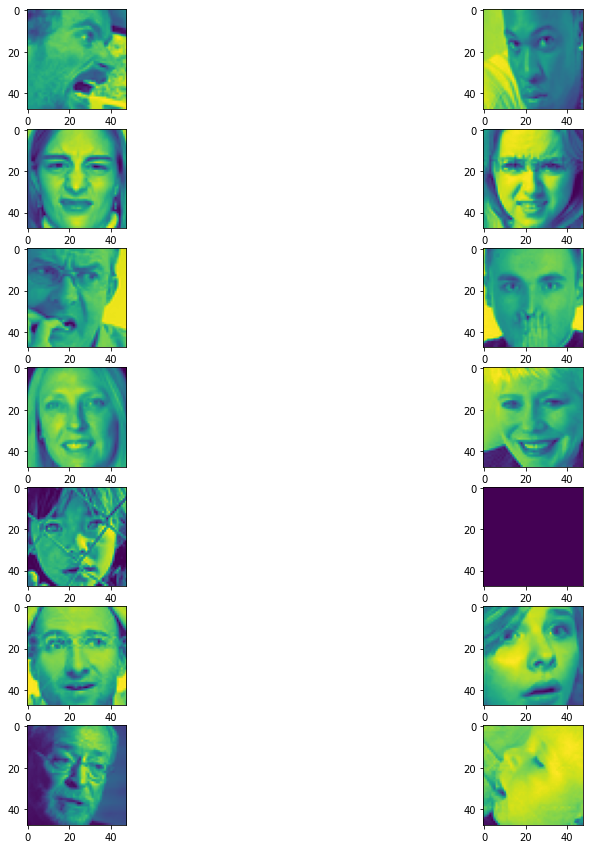

In [ ]:
j=1
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(0,7):
  filtered_df=train_data_all[train_data_all.emotion==i].sample(n=2, replace=False).index
  for train_sample in filtered_df:
    example = train_X[train_sample]
    example = example.reshape(example.shape[0],example.shape[1])
    #print(example)
    plt.subplot(7,2,j)
    plt.imshow(example)
    j+=1



In [ ]:
for i in range(0,7):
  filtered_df=train_data_all[train_data_all.emotion==i]
  print('Number of samples corresponding to  class',i,filtered_df.shape[0],' and corresponds to',filtered_df.shape[0]/train_data_all.shape[0]*100,'%')

Number of samples corresponding to  class 0 3995  and corresponds to 13.91549688251071 %
Number of samples corresponding to  class 1 436  and corresponds to 1.5186875195931588 %
Number of samples corresponding to  class 2 4097  and corresponds to 14.270786164617366 %
Number of samples corresponding to  class 3 7215  and corresponds to 25.13149186666202 %
Number of samples corresponding to  class 4 4830  and corresponds to 16.82399247622697 %
Number of samples corresponding to  class 5 3171  and corresponds to 11.045316799609878 %
Number of samples corresponding to  class 6 4965  and corresponds to 17.294228290779895 %


In [ ]:
import warnings
warnings.filterwarnings("ignore")  # Ignore some warning logs


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


#  Define a Feed-Forward Model with 2 hidden layers with dimensions 392 and 196 Neurons
model = Sequential([
  Dense(784, activation='relu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(784//2, activation='relu', name="second_hidden_layer"), Dropout(0.25),
  Dense(784//4, activation='relu', name="third_hidden_layer"), Dropout(0.3),
  Dense(784//8, activation='relu', name="fourth_hidden_layer"), Dropout(0.25),
  Dense(7, activation='softmax'),
])

#  Validate your Model Architecture
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden_layer (Dense)  (None, 784)               1807120   
                                                                 
 second_hidden_layer (Dense)  (None, 392)              307720    
                                                                 
 dropout (Dropout)           (None, 392)               0         
                                                                 
 third_hidden_layer (Dense)  (None, 196)               77028     
                                                                 
 dropout_1 (Dropout)         (None, 196)               0         
                                                                 
 fourth_hidden_layer (Dense)  (None, 98)               19306     
                                                                 
 dropout_2 (Dropout)         (None, 98)                0

In [ ]:
# Compile model
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

print("Train image shape: ", train_X.shape)
print(train_y.shape)

print("Train image shape: ", train_X.shape, "Flattened image shape: ", flatten_train_X.shape)
print(train_y.shape)


print(type(flatten_train_X[0,0]))
print(type(train_y[0]))
# Train model
model.fit(flatten_train_X, to_categorical(train_y), epochs=200, batch_size=256,)

Train image shape:  (28709, 48, 48, 1)
(28709,)
Train image shape:  (28709, 48, 48, 1) Flattened image shape:  (28709, 2304)
(28709,)
<class 'numpy.float32'>
<class 'numpy.int64'>
Epoch 1/200
113/113 [==============================] - 4s 8ms/step - loss: 1.9081 - accuracy: 0.2190
Epoch 2/200
113/113 [==============================] - 1s 8ms/step - loss: 1.8206 - accuracy: 0.2486
Epoch 3/200
113/113 [==============================] - 1s 8ms/step - loss: 1.7895 - accuracy: 0.2675
Epoch 4/200
113/113 [==============================] - 1s 8ms/step - loss: 1.7581 - accuracy: 0.2859
Epoch 5/200
113/113 [==============================] - 1s 8ms/step - loss: 1.7375 - accuracy: 0.2991
Epoch 6/200
113/113 [==============================] - 1s 8ms/step - loss: 1.7161 - accuracy: 0.3132
Epoch 7/200
113/113 [==============================] - 1s 8ms/step - loss: 1.6903 - accuracy: 0.3290
Epoch 8/200
113/113 [==============================] - 1s 8ms/step - loss: 1.6801 - accuracy: 0.3322
Epoch 9/200


In [ ]:
model.evaluate(flatten_valid_X, to_categorical(valid_y))

113/113 [==============================] - 1s 4ms/step - loss: 3.9824 - accuracy: 0.4380


[3.9823877811431885, 0.4380050301551819]

Training Accuracy : 98.5%
Validation Accuracy : 43%

Time : 3min

Total params: 2,211,867

In [ ]:
model_1 = Sequential([
  Dense(784, activation='relu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(784//2, activation='relu', name="second_hidden_layer"), Dropout(0.25),
  Dense(784//4, activation='relu', name="third_hidden_layer"), Dropout(0.3),
  Dense(784//8, activation='relu', name="fourth_hidden_layer"), Dropout(0.25),
  Dense(7, activation='softmax'),
])

print(model_1.summary())
model_1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

# Train model
model_1.fit(flatten_train_X, to_categorical(train_y), epochs=200, batch_size=128,)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden_layer (Dense)  (None, 784)               1807120   
                                                                 
 second_hidden_layer (Dense)  (None, 392)              307720    
                                                                 
 dropout_3 (Dropout)         (None, 392)               0         
                                                                 
 third_hidden_layer (Dense)  (None, 196)               77028     
                                                                 
 dropout_4 (Dropout)         (None, 196)               0         
                                                                 
 fourth_hidden_layer (Dense)  (None, 98)               19306     
                                                                 
 dropout_5 (Dropout)         (None, 98)               

In [ ]:
model_1.evaluate(flatten_valid_X, to_categorical(valid_y))

113/113 [==============================] - 1s 4ms/step - loss: 4.0366 - accuracy: 0.4503


[4.036596775054932, 0.45026469230651855]

Training Accuracy : 97.31%
Validation Accuracy : 46%

Time : 5min 27s

Total params: 2,211,867

In [ ]:
model_2 = Sequential([
  Dense(784, activation='relu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(784//2, activation='relu', name="second_hidden_layer"), Dropout(0.25),
  Dense(784//4, activation='relu', name="third_hidden_layer"), Dropout(0.3),
  Dense(784//8, activation='relu', name="fourth_hidden_layer"), Dropout(0.25),
  Dense(7, activation='softmax'),
])

print(model_2.summary())
model_2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

# Train model
model_2.fit(flatten_train_X, to_categorical(train_y), epochs=100, batch_size=128,)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden_layer (Dense)  (None, 784)               1807120   
                                                                 
 second_hidden_layer (Dense)  (None, 392)              307720    
                                                                 
 dropout_6 (Dropout)         (None, 392)               0         
                                                                 
 third_hidden_layer (Dense)  (None, 196)               77028     
                                                                 
 dropout_7 (Dropout)         (None, 196)               0         
                                                                 
 fourth_hidden_layer (Dense)  (None, 98)               19306     
                                                                 
 dropout_8 (Dropout)         (None, 98)               

In [ ]:
model_2.evaluate(flatten_valid_X, to_categorical(valid_y))

113/113 [==============================] - 1s 4ms/step - loss: 3.9752 - accuracy: 0.4622


[3.975227117538452, 0.46224576234817505]

Training Accuracy : 95.46%
Validation Accuracy : 44.6%

Time : 3min 22s

Total params: 2,211,867

In [ ]:
model_3 = Sequential([
  Dense(784, activation='relu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(784//2, activation='relu', name="second_hidden_layer"), Dropout(0.25),
  Dense(784//4, activation='relu', name="third_hidden_layer"), Dropout(0.3),
  Dense(784//16, activation='relu', name="fourth_hidden_layer"), Dropout(0.25),
  Dense(7, activation='softmax'),
])

print(model_3.summary())
model_3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

# Train model
model3s = model_3.fit(flatten_train_X, to_categorical(train_y), epochs=50, batch_size=64,)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden_layer (Dense)  (None, 784)               1807120   
                                                                 
 second_hidden_layer (Dense)  (None, 392)              307720    
                                                                 
 dropout_9 (Dropout)         (None, 392)               0         
                                                                 
 third_hidden_layer (Dense)  (None, 196)               77028     
                                                                 
 dropout_10 (Dropout)        (None, 196)               0         
                                                                 
 fourth_hidden_layer (Dense)  (None, 49)               9653      
                                                                 
 dropout_11 (Dropout)        (None, 49)               

In [ ]:
model_3.evaluate(flatten_valid_X, to_categorical(valid_y))

113/113 [==============================] - 1s 4ms/step - loss: 3.2661 - accuracy: 0.4553


[3.2661266326904297, 0.45528003573417664]

Training Accuracy : 89.67%
Validation Accuracy : 46.17%

Time : 2min 22s

Total params: 2,201,871

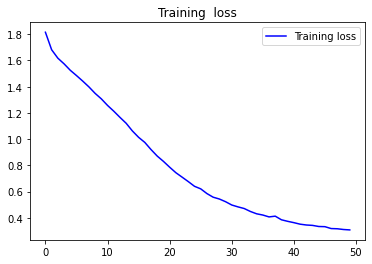

In [ ]:
loss = model3s.history['loss']

epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training  loss')
plt.legend()

plt.show()

In [ ]:
model_4 = Sequential([
  Dense(784, activation='relu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(784//2, activation='relu', name="second_hidden_layer"), Dropout(0.25),
  Dense(784//4, activation='relu', name="third_hidden_layer"), Dropout(0.3),
  Dense(784//6, activation='relu', name="fourth_hidden_layer"), Dropout(0.25),
  Dense(7, activation='softmax'),
])

print(model_4.summary())
model_4.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

# Train model
model_4.fit(flatten_train_X, to_categorical(train_y), epochs=200, batch_size=128,)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden_layer (Dense)  (None, 784)               1807120   
                                                                 
 second_hidden_layer (Dense)  (None, 392)              307720    
                                                                 
 dropout_12 (Dropout)        (None, 392)               0         
                                                                 
 third_hidden_layer (Dense)  (None, 196)               77028     
                                                                 
 dropout_13 (Dropout)        (None, 196)               0         
                                                                 
 fourth_hidden_layer (Dense)  (None, 130)              25610     
                                                                 
 dropout_14 (Dropout)        (None, 130)              

In [ ]:
model_4.evaluate(flatten_valid_X, to_categorical(valid_y))

113/113 [==============================] - 1s 4ms/step - loss: 4.2175 - accuracy: 0.4592


[4.217480659484863, 0.4591808319091797]

Training Accuracy : 97.45%
Validation Accuracy : 45.95%

Time : 6min

Total params: 2,218,395

In [ ]:
model_5 = Sequential([
  Dense(784, activation='relu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(784//2, activation='relu', name="second_hidden_layer"), Dropout(0.25),
  Dense(784//4, activation='relu', name="third_hidden_layer"), Dropout(0.3),
  Dense(784//6, activation='relu', name="fourth_hidden_layer"), Dropout(0.25),
  Dense(7, activation='softmax'),
])

print(model_5.summary())
model_5.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

# Train model
model_5.fit(flatten_train_X, to_categorical(train_y), epochs=200, batch_size=128,)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden_layer (Dense)  (None, 784)               1807120   
                                                                 
 second_hidden_layer (Dense)  (None, 392)              307720    
                                                                 
 dropout_15 (Dropout)        (None, 392)               0         
                                                                 
 third_hidden_layer (Dense)  (None, 196)               77028     
                                                                 
 dropout_16 (Dropout)        (None, 196)               0         
                                                                 
 fourth_hidden_layer (Dense)  (None, 130)              25610     
                                                                 
 dropout_17 (Dropout)        (None, 130)              

In [ ]:
model_5.evaluate(flatten_valid_X, to_categorical(valid_y))

113/113 [==============================] - 1s 4ms/step - loss: 4.0492 - accuracy: 0.4558


[4.049223899841309, 0.45583727955818176]

Training Accuracy : 97.58%
Validation Accuracy : 46.98%

Time : 5min 30s

Total params: 2,218,395

In [ ]:
model_6 = Sequential([
  Dense(784, activation='relu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(784//2, activation='relu', name="second_hidden_layer"), Dropout(0.25),
  Dense(784//4, activation='relu', name="third_hidden_layer"), Dropout(0.3),
  Dense(784//6, activation='relu', name="fourth_hidden_layer"), Dropout(0.25),
  Dense(7, activation='softmax'),
])

print(model_6.summary())
model_6.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

# Train model
model_6s = model_6.fit(flatten_train_X, to_categorical(train_y), epochs=250, batch_size=128,)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden_layer (Dense)  (None, 784)               1807120   
                                                                 
 second_hidden_layer (Dense)  (None, 392)              307720    
                                                                 
 dropout_18 (Dropout)        (None, 392)               0         
                                                                 
 third_hidden_layer (Dense)  (None, 196)               77028     
                                                                 
 dropout_19 (Dropout)        (None, 196)               0         
                                                                 
 fourth_hidden_layer (Dense)  (None, 130)              25610     
                                                                 
 dropout_20 (Dropout)        (None, 130)              

In [ ]:
model_6.evaluate(flatten_valid_X, to_categorical(valid_y))

113/113 [==============================] - 1s 4ms/step - loss: 4.7514 - accuracy: 0.4558


[4.751370906829834, 0.45583727955818176]

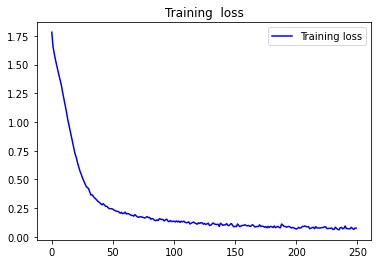

In [ ]:
loss = model_6s.history['loss']

epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training  loss')
plt.legend()

plt.show()

Training Accuracy : 98%
Validation Accuracy : 45.83%

Time : 5min 30s

Total params: 2,218,395

In [ ]:
final_acc = model_5.evaluate(flatten_test_X, to_categorical(test_y))

print('Final Accuracy of the model on FFN',final_acc[1]*100,'%')

113/113 [==============================] - 0s 4ms/step - loss: 4.0202 - accuracy: 0.4622
Final Accuracy of the model on FFN 46.224576234817505 %


In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D

In [ ]:
common_features_0 = Sequential()
common_features_0.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(48, 48, 1)))
common_features_0.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
common_features_0.add(MaxPooling2D(pool_size=(2, 2)))

common_features_0.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
common_features_0.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
common_features_0.add(MaxPooling2D(pool_size=(2, 2)))

common_features_0.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
common_features_0.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
common_features_0.add(MaxPooling2D(pool_size=(2, 2)))

common_features_0.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
common_features_0.add(Dense(64, activation='relu'))
common_features_0.add(Dense(7, activation='softmax'))

cnn_model_0 = Sequential(common_features_0)

print(cnn_model_0.summary())  # Compare number of parameteres against FFN

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 7)                 581863    
                                                                 
Total params: 581,863
Trainable params: 581,863
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
cnn_model_0.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)
cnn_model_0.fit(train_X, to_categorical(train_y), epochs=3, batch_size=128,)

Epoch 1/3
225/225 [==============================] - 41s 54ms/step - loss: 1.6134 - accuracy: 0.3616
Epoch 2/3
225/225 [==============================] - 12s 53ms/step - loss: 1.3027 - accuracy: 0.5055
Epoch 3/3
225/225 [==============================] - 12s 53ms/step - loss: 1.1427 - accuracy: 0.5678


In [ ]:
cnn_model_0.evaluate(valid_X, to_categorical(valid_y))

113/113 [==============================] - 1s 10ms/step - loss: 1.1400 - accuracy: 0.5759


[1.1400444507598877, 0.5759264230728149]

Training Accuracy : 56.16%
Validation Accuracy : 54.36%

Time : 42s

Total params: 581,863

In [ ]:
common_features_1 = Sequential()
common_features_1.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(48, 48, 1)))
common_features_1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
common_features_1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
common_features_1.add(MaxPooling2D(pool_size=(2, 2)))

common_features_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
common_features_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
common_features_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
common_features_1.add(MaxPooling2D(pool_size=(2, 2)))

common_features_1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
common_features_1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
common_features_1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
common_features_1.add(MaxPooling2D(pool_size=(2, 2)))

common_features_1.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
common_features_1.add(Dense(64, activation='relu'))
common_features_1.add(Dense(7, activation='softmax'))

cnn_model_1 = Sequential(common_features_1)

print(cnn_model_1.summary())  # Compare number of parameteres against FFN
cnn_model_1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 7)                 775623    
                                                                 
Total params: 775,623
Trainable params: 775,623
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:

# Train model
cnn_model_1.fit(train_X, to_categorical(train_y), epochs=3, batch_size=128,)

Epoch 1/3
225/225 [==============================] - 19s 82ms/step - loss: 1.7897 - accuracy: 0.2679
Epoch 2/3
225/225 [==============================] - 18s 82ms/step - loss: 1.4400 - accuracy: 0.4464
Epoch 3/3
225/225 [==============================] - 18s 82ms/step - loss: 1.2565 - accuracy: 0.5211


In [ ]:
cnn_model_1.evaluate(valid_X, to_categorical(valid_y))

113/113 [==============================] - 2s 12ms/step - loss: 1.2488 - accuracy: 0.5127


[1.248800277709961, 0.5126776099205017]

Training Accuracy : 57.85%
Validation Accuracy : 56.26%

Time : 1min

Total params: 775,623

In [ ]:
cnn_model_2 = Sequential(common_features_1)

print(cnn_model_2.summary())  # Compare number of parameteres against FFN
cnn_model_2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

# Train model
cnn_model_2.fit(train_X, to_categorical(train_y), epochs=5, batch_size=64,)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 7)                 775623    
                                                                 
Total params: 775,623
Trainable params: 775,623
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
449/449 [==============================] - 23s 47ms/step - loss: 1.1647 - accuracy: 0.5585
Epoch 2/5
449/449 [==============================] - 21s 47ms/step - loss: 1.0750 - accuracy: 0.5957
Epoch 3/5
449/449 [==============================] - 21s 47ms/step - loss: 1.0030 - accuracy: 0.6226
Epoch 4/5
449/449 [==============================] - 21s 47ms/step - loss: 0.9116 - accuracy: 0.6562
Epoch 5/5
449/449 [==============================] - 21s 47ms/step - loss: 0.8307 - accuracy: 0.6884


In [ ]:
cnn_model_2.evaluate(valid_X, to_categorical(valid_y))

113/113 [==============================] - 2s 13ms/step - loss: 1.1513 - accuracy: 0.5985


[1.151302695274353, 0.5984954237937927]

Training Accuracy : 73.11%
Validation Accuracy : 58.51%

Time : 2min

Total params: 775,623

In [ ]:
cnn_model_3 = Sequential(common_features_1)

print(cnn_model_3.summary())  # Compare number of parameteres against FFN
cnn_model_3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

# Train model
cnn_model_3.fit(train_X, to_categorical(train_y), epochs=8, batch_size=64,)
cnn_model_3.evaluate(valid_X, to_categorical(valid_y))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 7)                 775623    
                                                                 
Total params: 775,623
Trainable params: 775,623
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/8
449/449 [==============================] - 22s 47ms/step - loss: 0.7017 - accuracy: 0.7408
Epoch 2/8
449/449 [==============================] - 21s 47ms/step - loss: 0.5941 - accuracy: 0.7805
Epoch 3/8
449/449 [==============================] - 21s 47ms/step - loss: 0.5009 - accuracy: 0.8157
Epoch 4/8
449/449 [==============================] - 21s 47ms/step - loss: 0.4167 - accuracy: 0.8453
Epoch 5/8
449/449 [==============================] - 21s 47ms/step - loss: 0.3602 - accuracy: 0.8700
Epoch 6/8
449/449 [==============================] - 21s 47ms/ste

[1.9502249956130981, 0.5990526676177979]

Training Accuracy : 91.76%
Validation Accuracy : 57.48%

Time : 2min

Total params: 775,623

In [ ]:
common_features_2 = Sequential()
common_features_2.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(48, 48, 1)))
common_features_2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
common_features_2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
common_features_2.add(MaxPooling2D(pool_size=(2, 2)))

common_features_2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
common_features_2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
common_features_2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
common_features_2.add(MaxPooling2D(pool_size=(2, 2)))

common_features_2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
common_features_2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
common_features_2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
common_features_2.add(MaxPooling2D(pool_size=(2, 2)))

common_features_2.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
common_features_2.add(Dense(64, activation='relu',kernel_regularizer=l2(0.01)))
common_features_2.add(Dense(7, activation='softmax',kernel_regularizer=l2(0.01)))

cnn_model_4 = Sequential(common_features_2)

print(cnn_model_4.summary())  # Compare number of parameteres against FFN
cnn_model_4.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

In [ ]:
cnn_model_2.evaluate(test_X, to_categorical(test_y))